In [1]:
# import necessary libraries
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize the images' pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# expand dimensions for CNN input
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)

# convert labels to one-hot encoding with 10 classes for MNIST dataset
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
# build the CNN model
model = models.Sequential([
        keras.Input(shape=(28, 28, 1)),  
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), 
        layers.MaxPooling2D(pool_size=(2, 2)),  
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), 
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Flatten(),  
        layers.Dropout(0.5),  
        layers.Dense(10, activation="softmax"), 
])

In [4]:
# compile the model and set optimizer and loss functions
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"]) 

# train the model on the training dataset for 3 epochs
history = model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.1)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7581 - loss: 0.7717 - val_accuracy: 0.9757 - val_loss: 0.0856
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9634 - loss: 0.1172 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9739 - loss: 0.0862 - val_accuracy: 0.9880 - val_loss: 0.0440


313/313 - 1s - 2ms/step - accuracy: 0.9854 - loss: 0.0448


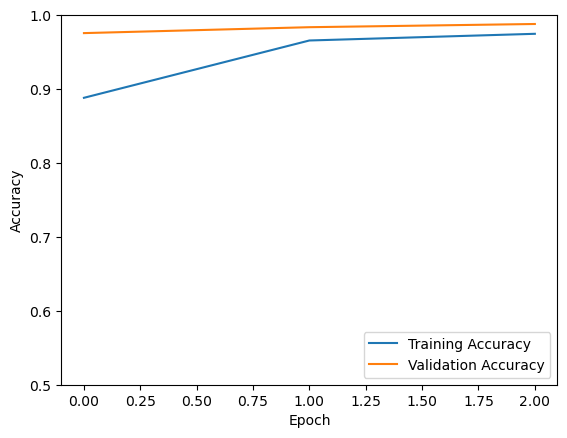

In [5]:
# evaluate the trained model on test dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Plot the training accuracy vs. validation accuracy to visualize performance
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")  # Label x-axis as "Epoch"
plt.ylabel("Accuracy")  # Label y-axis as "Accuracy"
plt.ylim([0.5, 1])  # Set y-axis range from 0.5 to 1 for better visualization
plt.legend(loc="lower right")  # Add legend in lower-right corner
plt.show()  # Display the plot

In [ ]:
# Results:
#
# With a final test accuracy of about 98.54%, the CNN model achieves a really good 
# accuracy on unseen test images. Compared to the CNN model example and it's low
# accuracy of about 71.66%, I am not completely sure why this one is able to get
# a higher accuracy. Perhaps the one-hot encoding helped.